<a href="https://colab.research.google.com/github/yohanesnuwara/pyMRST/blob/main/notebooks/pyMRST_gas_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation of Compressible Gas Reservoir with PyMRST

In [1]:
# Clone pyMRST
!git clone https://github.com/yohanesnuwara/pyMRST

Cloning into 'pyMRST'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 287 (delta 78), reused 0 (delta 0), pack-reused 132
Receiving objects: 100% (287/287), 883.00 KiB | 7.68 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Add directory where you install PyMRST
import sys
sys.path.append("/content/pyMRST") 

import pymrst
from pymrst_units import *

In [3]:
# Setup PyMRST (Takes about 3 minutes)
pymrst.setup()

In [4]:
# Geometry
nx, ny, nz = 30, 20, 10
lx, ly, lz = 200, 200, 50

# Reservoir property                                         
# poro = dict({"type": "heterogeneous", 
#              "field": "gaussian", 
#              "min": 0.2, "max": 0.4, "std": 2.5})
poro = dict({"type": "homogeneous", 
             "value": .3})

# k = dict({"type": "heterogeneous", 
#           "field": "kozeny"})
k = dict({"type": "homogeneous", 
          "value": 30*milli()*darcy()})

ntg = dict({"type": "heterogeneous", 
            "field": "lognorm", 
            "min": 0.4, "max": 0.6})

# Rock property
rock = dict({"c": 1e-6*(1/1e+5), # Rock compressibility at ref pressure, 1/bar to 1/Pa
             "p_r": 200*1e+5}) # Reference pressure, bar to Pa

# Fluid property: 1-phase gas
fluid = dict({"type": "gas", 
              "mu0": 5*centi()*poise(), # cp to Pa.s 
              "rho_r": 850, # Density at reference pressure
              "rhoS": 750, # Density on the surface
              "p_r": 200*barsa(), # Reference pressure, bar to Pa
              "c": 1e-3/barsa(), # Fluid compressibility, 1/bar to 1/Pa
              "c_mu": 2e-3/barsa()}) # Viscosity coefficient, 1/bar to 1/Pa  

# Boundary 
bc_front = dict({"type": "fluxside", "value": 50 * 1.84e-6}) # bbl/d to m3/s
bc_back = dict({"type": "fluxside", "value": 0})
bc_left = dict({"type": "fluxside", "value": 100 * 1.1574e-5}) # m3/d to m3/s
bc_right = dict({"type": "pside", "value": 100 * 1e+5}) # bar to Pa

# Well
# cell_loc1 = np.concatenate((np.arange(311,381+10,10), np.arange(411,481+10,10),
#                             np.arange(412,482+10,10), np.arange(312,382+10,10), 
#                             np.array([491,391])))

# well = dict({"cell_loc": [cell_loc1],
#              "type": ["bhp"],
#              "value": [100*1e5],
#              "radius": [.1],
#              "skin": [0],
#              "direction": ["y"]})

cell_loc1 = np.arange(10+60, nx*ny*nz, nx*ny)

well = dict({"cell_loc": [cell_loc1], 
             "type": ["bhp"], 
             "value": [100*1e5], # bar to Pa 
             "radius": [.1],
             "skin": [0], 
             "direction": [None]}) 

# Time step
numSteps, totTime = 52, 365
steps = [2, 5, 10, 20]

In [8]:
# Execute function
pymrst.write_input(nx, ny, nz, lx, ly, lz, poro, k, rock, fluid, well, 
                   bc_front, bc_back, bc_left, bc_right, numSteps, totTime, steps)

In [9]:
# Execute simulator
# Simulator results are added in new directory "result_gas_1phase"
pymrst.gas_1phase()


Time step 1: Time 0.00 -> 7.02 days
  Iteration   1:  Res = 1.0021e+07
  Iteration   2:  Res = 1.6682e-02
  Iteration   3:  Res = 1.7289e-05
  Iteration   4:  Res = 1.1053e-11

Time step 2: Time 7.02 -> 14.04 days
  Iteration   1:  Res = 6.9784e-02
  Iteration   2:  Res = 2.5085e-04
  Iteration   3:  Res = 2.1932e-09

Time step 3: Time 14.04 -> 21.06 days
  Iteration   1:  Res = 4.1683e-02
  Iteration   2:  Res = 7.0261e-05
  Iteration   3:  Res = 1.8724e-10

Time step 4: Time 21.06 -> 28.08 days
  Iteration   1:  Res = 3.3127e-02
  Iteration   2:  Res = 4.3438e-05
  Iteration   3:  Res = 7.9832e-11

Time step 5: Time 28.08 -> 35.10 days
  Iteration   1:  Res = 2.8698e-02
  Iteration   2:  Res = 3.3181e-05
  Iteration   3:  Res = 4.5054e-11

Time step 6: Time 35.10 -> 42.12 days
  Iteration   1:  Res = 2.6122e-02
  Iteration   2:  Res = 2.8138e-05
  Iteration   3:  Res = 3.2201e-11

Time step 7: Time 42.12 -> 49.13 days
  Iteration   1:  Res = 2.4505e-02
  Iteration   2:  Res = 2.5315

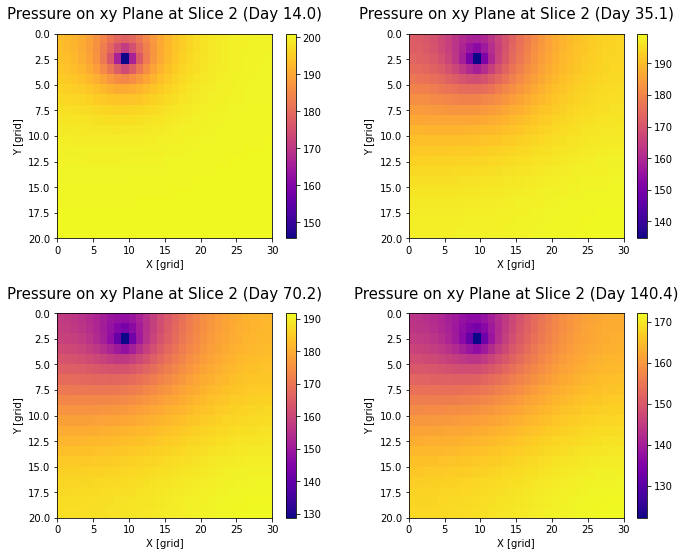

In [10]:
# Specify dimension
dimension = (nx,ny,nz)

# Input for plots
plane, position = "xy", 2

numSteps, totTime = 52, 365 # day
steps = [2, 5, 10, 20]

# Plot pressure for every timestep
plt.figure(figsize=(10,8))

for i in range(len(steps)):
  directory = "/content/result_gas_1phase/"
  filename = "pressure{}.mat".format(steps[i])

  # Get cell data 
  cube = pymrst.getCellData(directory, filename, dimension=(nx,ny,nz))

  # Convert to barsa
  cube = cube/barsa()

  # Plot for every timestep
  day = totTime / numSteps * steps[i]
  plt.subplot(2,2,i+1)
  pymrst.plotCellData(cube, plane, position, cmap="plasma")
  plt.title("Pressure on {} Plane at Slice {} (Day {:.1f})".format(plane, position, day),
            size=15, pad=15)  

plt.tight_layout(1.7)
plt.show()